In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
np.random.seed(10)

In [3]:
file_path = 'data/titanic3.xls'

In [4]:
all_df = pd.read_excel(file_path)

In [5]:
all_df[:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [7]:
msk = np.random.rand(len(all_df)) < 0.8

In [8]:
train_df = all_df[msk]
test_df = all_df[~msk]

In [9]:
print('total:', len(all_df), 'train:', len(train_df), 'test:', len(test_df))

total: 1309 train: 1034 test: 275


In [10]:
def preprocess_data(raw_df):
    df = raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)    
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female': 0, 'male': 1}).astype(int)
    x_one_hot_df = pd.get_dummies(data=df, columns=['embarked'])
    nd_array = x_one_hot_df.values
    label = nd_array[:,0]
    features = nd_array[:,1:]
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaled_features = minmax_scale.fit_transform(features)
    
    return scaled_features, label

In [11]:
train_feature, train_label = preprocess_data(train_df)
test_feature, test_label = preprocess_data(test_df)

In [12]:
model = Sequential()

In [13]:
model.add(Dense(units=40, input_dim=9, kernel_initializer='uniform', activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))

In [15]:
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
train_history = model.fit(x=train_feature, y=train_label, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6901 - acc: 0.5774 - val_loss: 0.6712 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6683 - acc: 0.5946 - val_loss: 0.5924 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6112 - acc: 0.6645 - val_loss: 0.4952 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5466 - acc: 0.7624 - val_loss: 0.4629 - val_acc: 0.7788
Epoch 5/30
 - 0s - loss: 0.5070 - acc: 0.7602 - val_loss: 0.4551 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4915 - acc: 0.7645 - val_loss: 0.4401 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4825 - acc: 0.7591 - val_loss: 0.4419 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4790 - acc: 0.7602 - val_loss: 0.4348 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4730 - acc: 0.7634 - val_loss: 0.4270 - val_acc: 0.7981
Epoch 10/30
 - 0s - loss: 0.4695 - acc: 0.7742 - val_loss: 0.4251 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.4654 - acc: 0.7645 - val_loss: 0.4225 - val_acc

In [19]:
def show_train_history(train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc="upper left")
    plt.show()

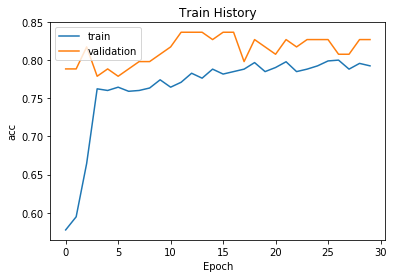

In [20]:
show_train_history('acc', 'val_acc')

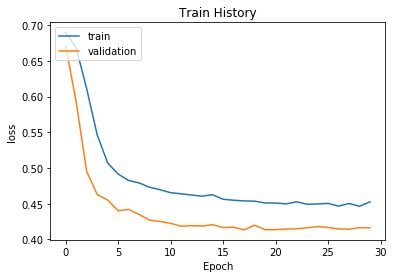

In [21]:
show_train_history('loss', 'val_loss')

In [22]:
scores = model.evaluate(x=test_feature, y=test_label)

275/275 [==============================] - 0s 36us/step


In [23]:
scores[1]

0.8145454549789428

In [24]:
jr_df = pd.DataFrame([
    [0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'],
    [1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'],
], columns=cols)

In [25]:
all_df = pd.concat([all_df, jr_df])

In [26]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [27]:
all_features, _ = preprocess_data(all_df)

In [28]:
all_probability = model.predict(all_features)

In [29]:
all_probability[:10]

array([[0.9776027 ],
       [0.62186414],
       [0.97364175],
       [0.41299975],
       [0.9720168 ],
       [0.27611107],
       [0.94754493],
       [0.32703626],
       [0.9465134 ],
       [0.2926177 ]], dtype=float32)

In [30]:
pd = all_df
pd.insert(len(all_df.columns), 'probability', all_probability)

In [31]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.151526
1,1,Rose,1,female,20.0,1,0,100.0,S,0.970630


In [32]:
pd[(pd['survived'] == 0) & (pd['probability']  > 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.973642
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.972017
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.978330
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.975891
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.960528


In [33]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.977603
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.621864
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.973642
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.413000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.972017
